# Jitter issues
After closely inspecting panchromatic (as well as filtered) pixels along consequent frames, there seems to be some weired inconsistent trend (jitter) in the obtained grey levels. The dynamic range of the jitter can be as high as 400 Grey levels, which are equivilent to 5-6 degrees.

The jitter issue is problematic since it affects the quality of the camera's modeling and calibration, and since an acquisition of a static scene can result in significant unpredictable bias differences.

Different configurations of the camera produced different jitter over time.
Two main parameters were set:
- Flat Field Correction (FFC). This is a calibration process of the camera, where the shutter is closed momenterilly (~0.4 seconds) and an offset value for each pixel is updated from a lookup table, using the internal camera temperature (FPA and Housing temperatures). The FFC can be either performed once in the begining of the measure, or every preset number of frames (e.g, every one minute).
- Temperature linear grey levels (Tlinear in short). When active (tlinear1) the grey levels are transformed by the camera such that:
    0.04 * GL - 273.15 is the targets temperature (as estimated by the camera). 
    When inactive (tlinear0), the GL represent the radiation flux on the bolometer array.

The following figures shows the effect of several configurations on the jitter.

The next figure is with *tlinear1*, and *FFC only before the measurements*.
As seen, the dynamic range is ~450 GL.


The next figure is with *tlinear0*, and *FFC every 1 minute*.
The dynamic range has improved to ~300GL, which is still a large margin. 


When *tlinear1*, the results can be shown as temperatures with a comparision to the real BlackBody temperautre.

---

below is an example of the jitter in grey levels across 100K consecutively acquired frame (equivalent to ~30 minutes), at different random pixel locations:

In [1]:
# automaticlly updates imported methods when they change
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
sys.path.append(str(Path().cwd().parent))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load measurements: 100%|████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:18<00:00, 18.52s/it]



FFC True	 TLinear True


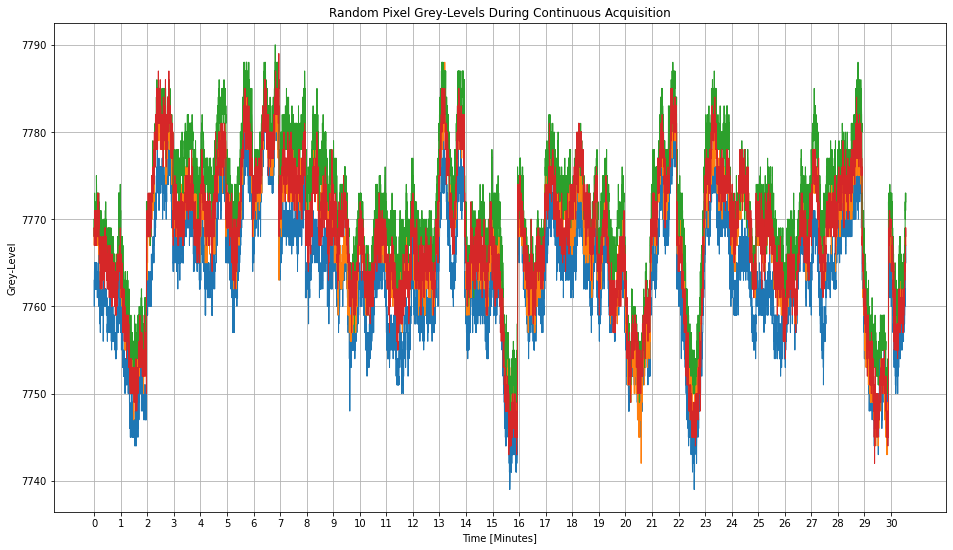

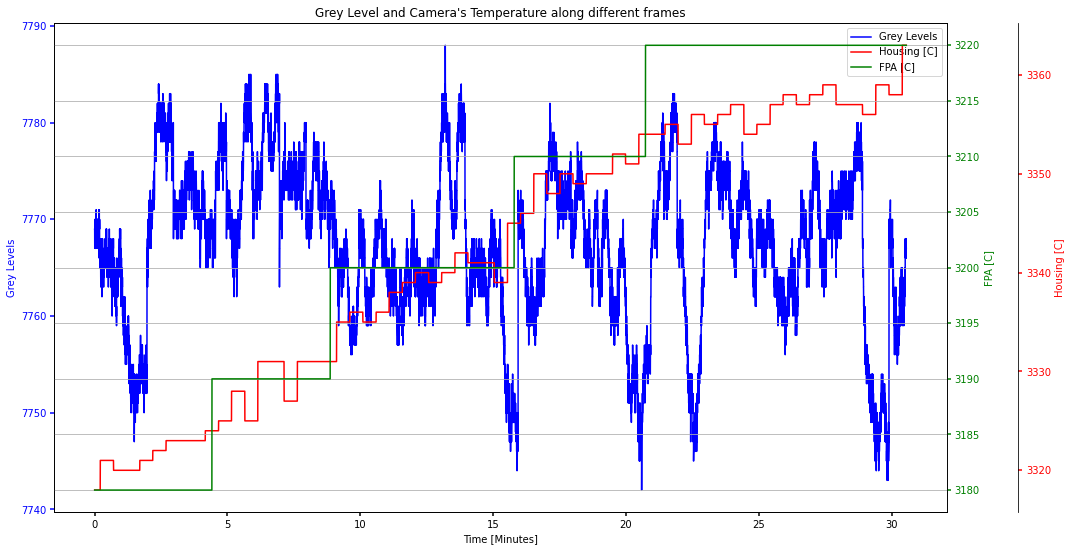

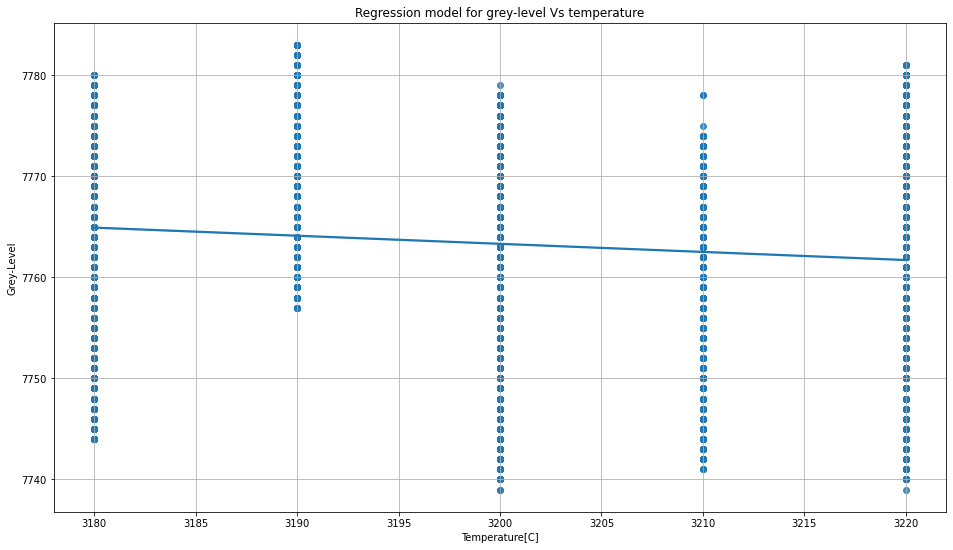

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Correlation Coefficients:
[[ 1.         -0.14733408]
 [-0.14733408  1.        ]]



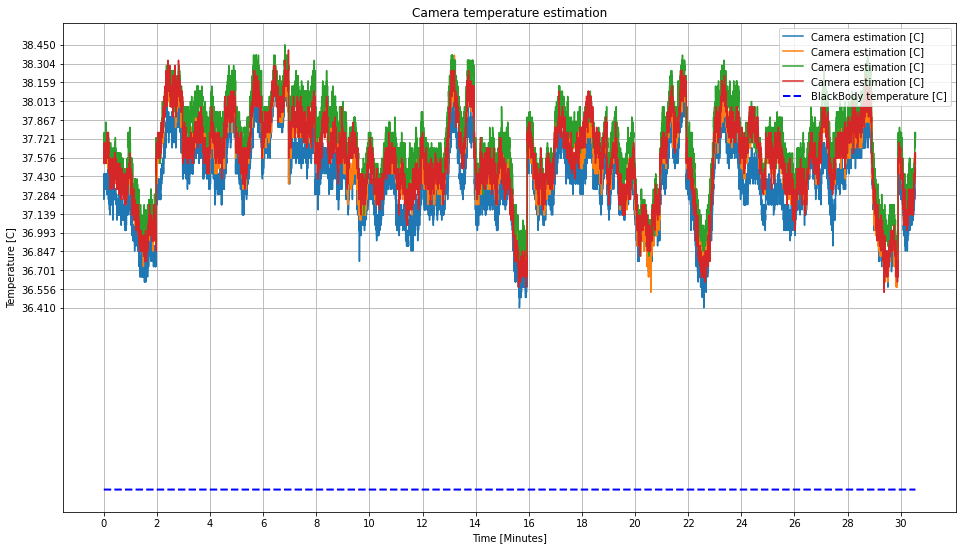

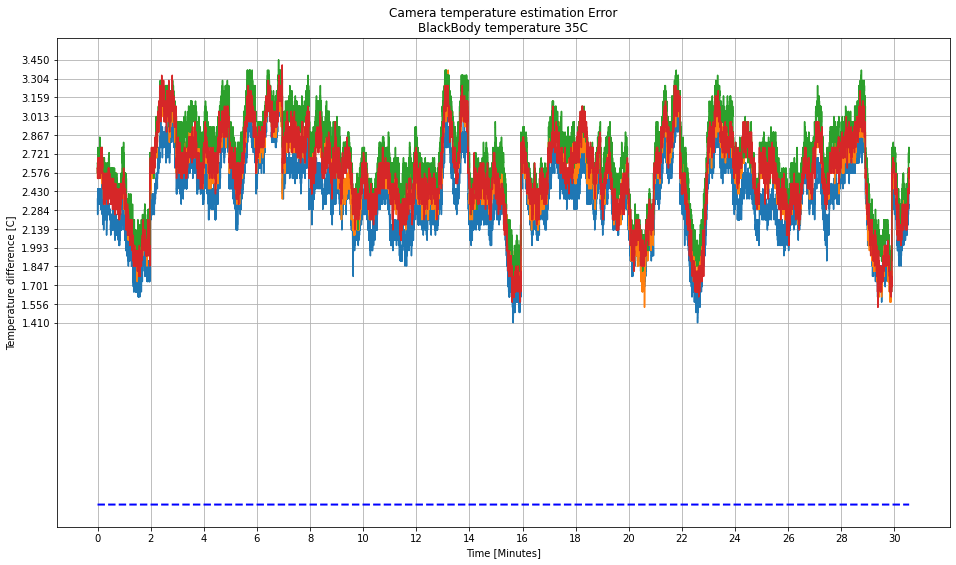

################################################################################
################################################################################



Load measurements: 100%|████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:35<00:00, 35.74s/it]



FFC False	 TLinear True


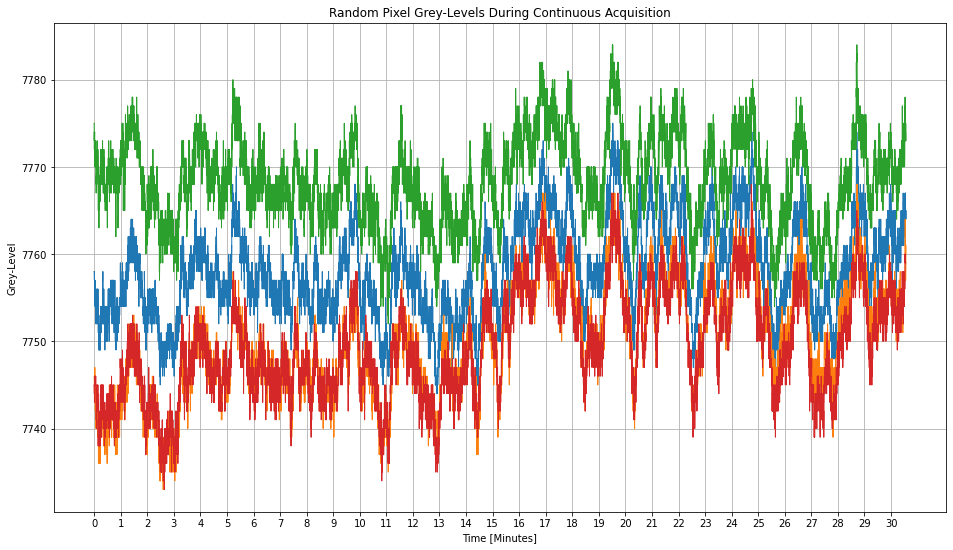

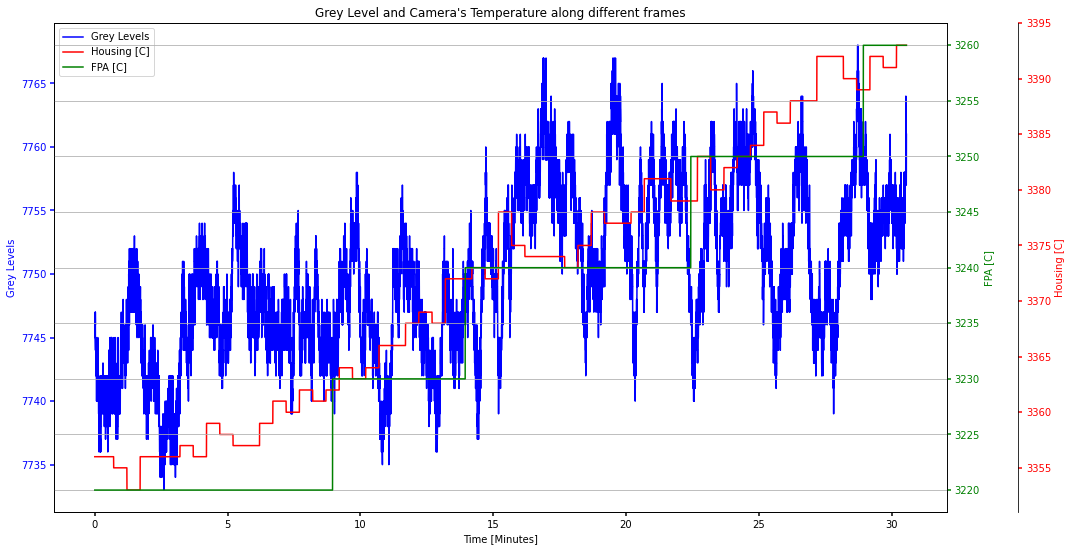

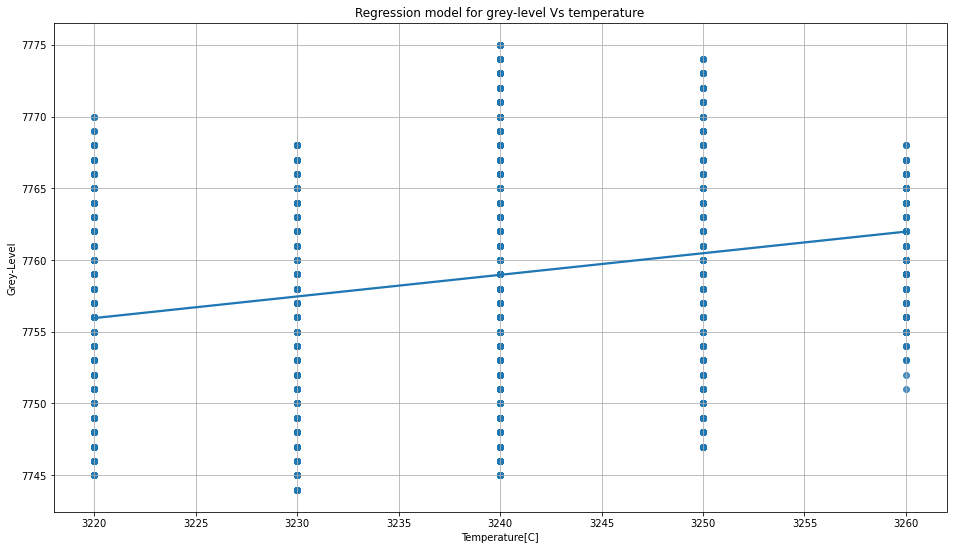

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Correlation Coefficients:
[[1.         0.35475419]
 [0.35475419 1.        ]]



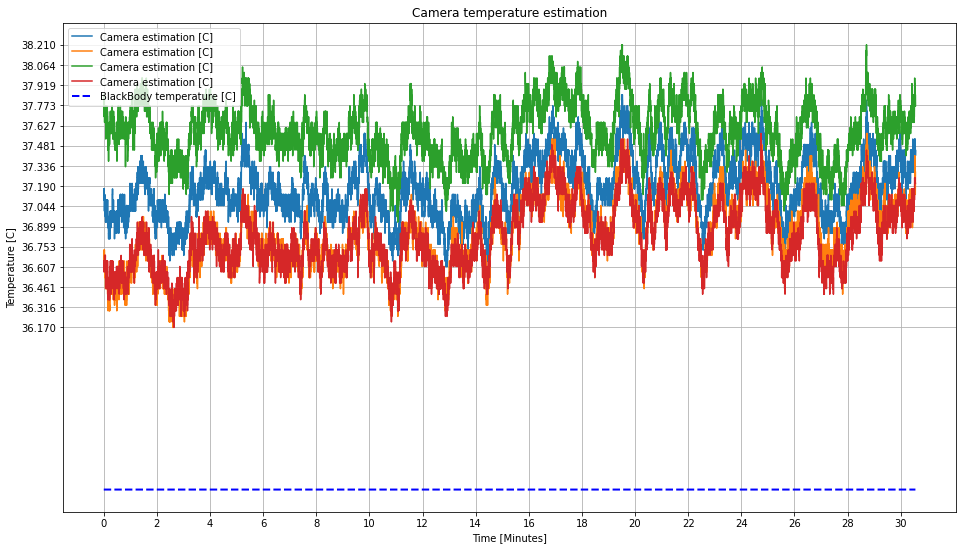

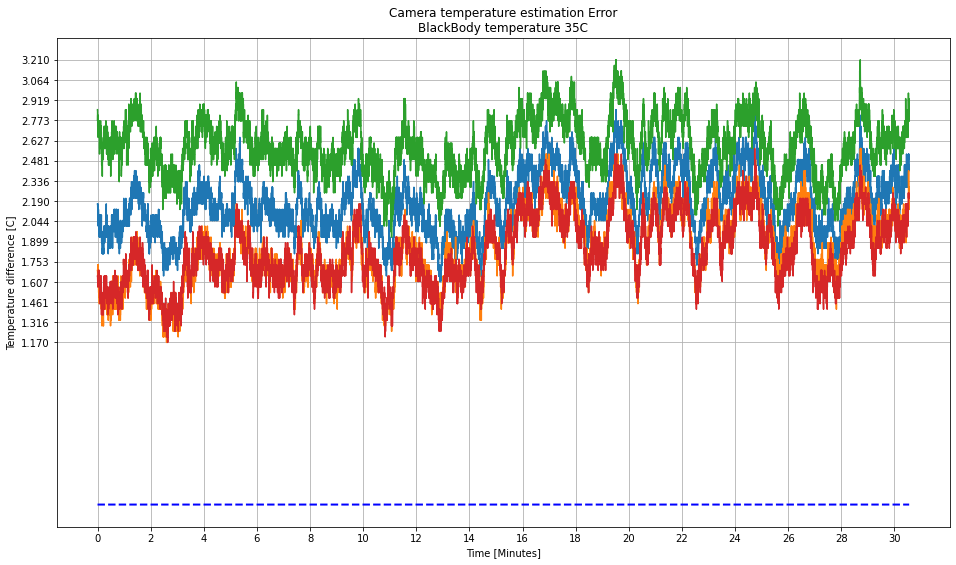

################################################################################
################################################################################



Load measurements: 100%|████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:38<00:00, 38.23s/it]



FFC False	 TLinear False


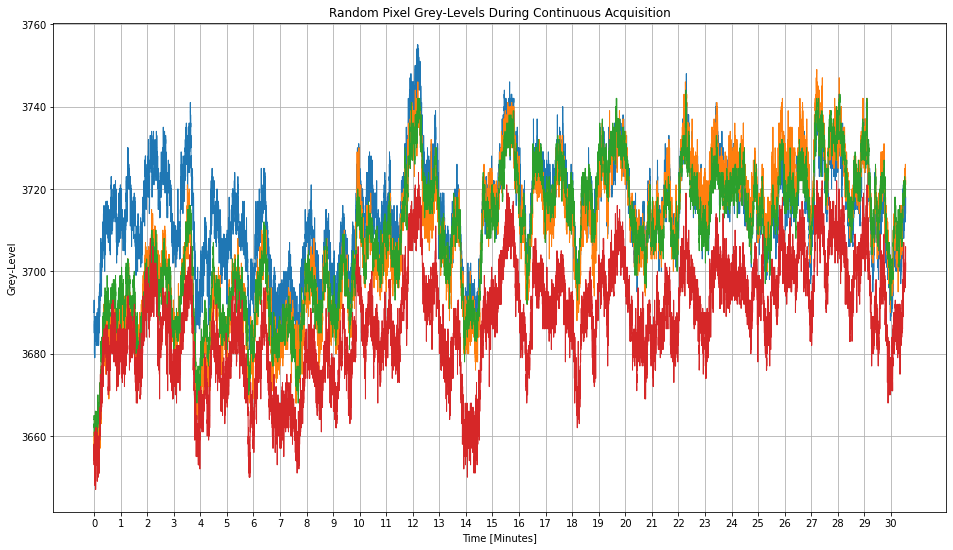

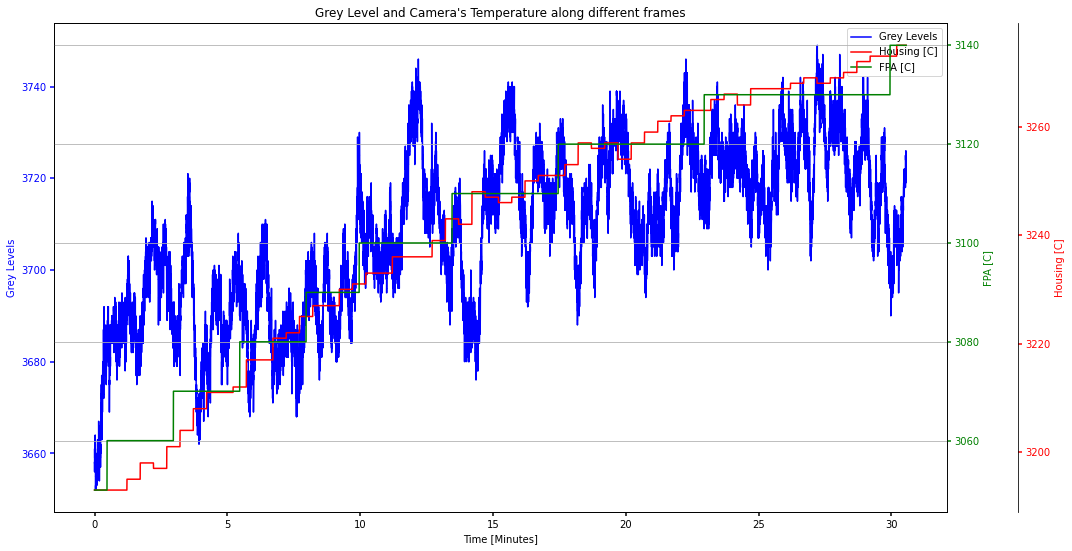

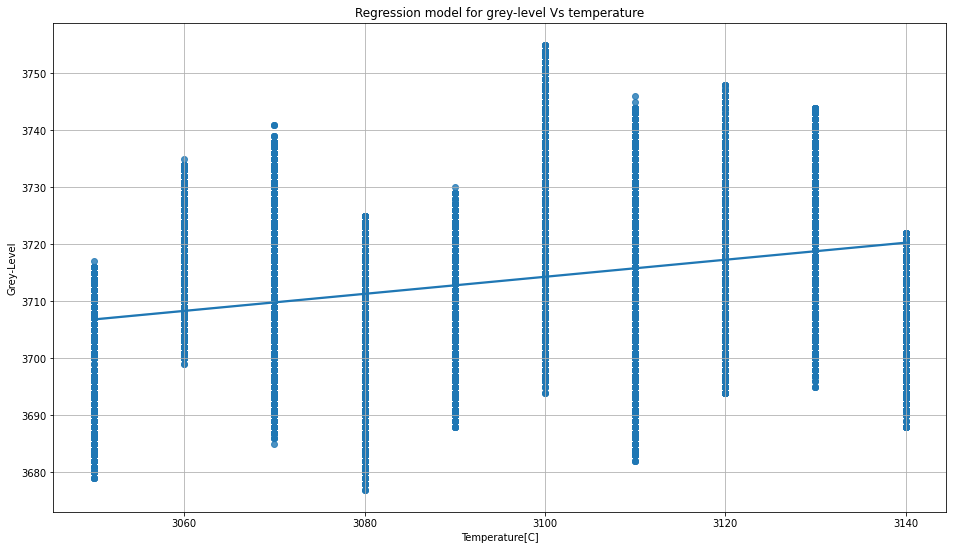

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Correlation Coefficients:
[[1.         0.29900972]
 [0.29900972 1.        ]]

################################################################################
################################################################################



Load measurements: 100%|████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:35<00:00, 35.64s/it]



FFC True	 TLinear False


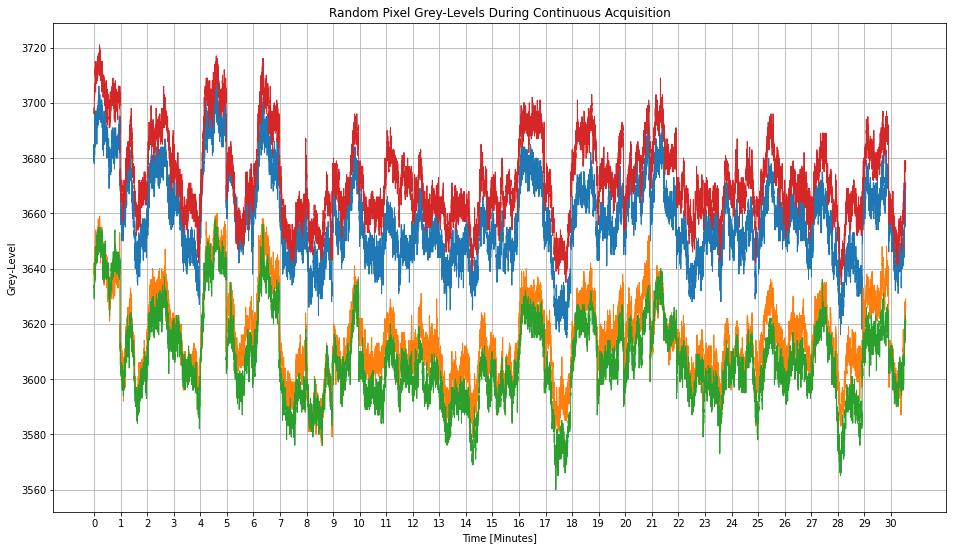

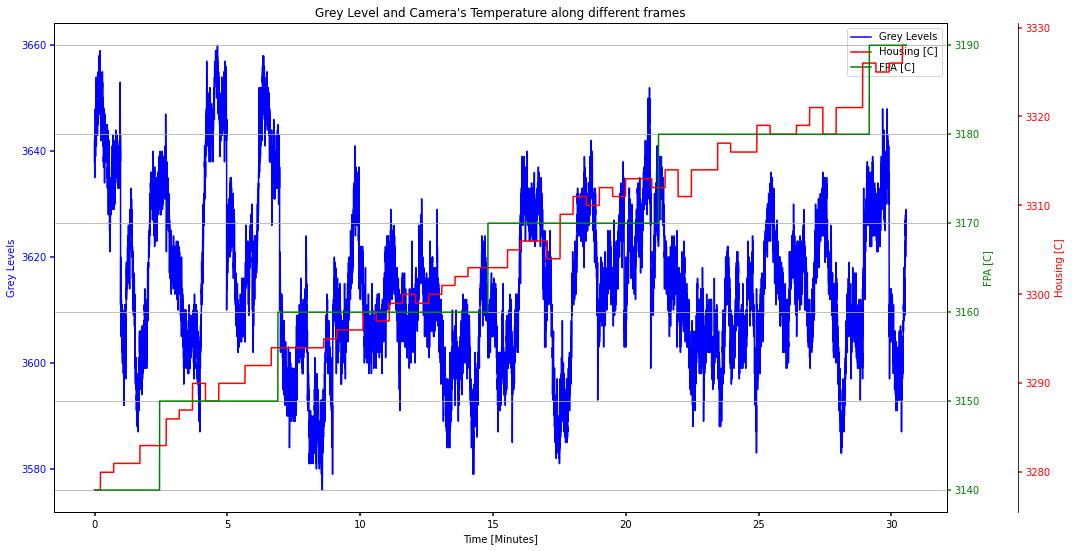

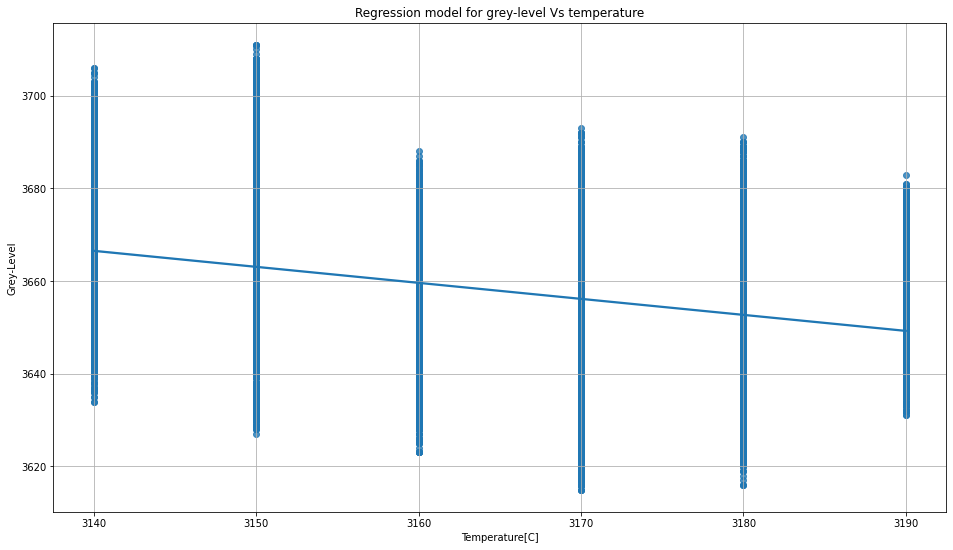

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Correlation Coefficients:
[[ 1.         -0.30069629]
 [-0.30069629  1.        ]]

################################################################################
################################################################################



In [2]:
from plots import load_and_plot
from time import sleep 


path_to_files = Path.cwd()
while not (path_to_files / "rawData").is_dir():
    path_to_files = path_to_files.parent
path_to_files = path_to_files / "rawData" / 'jitter' 
path_to_files = list(path_to_files.glob('*.pkl'))

for path in path_to_files:
    load_and_plot(path)
